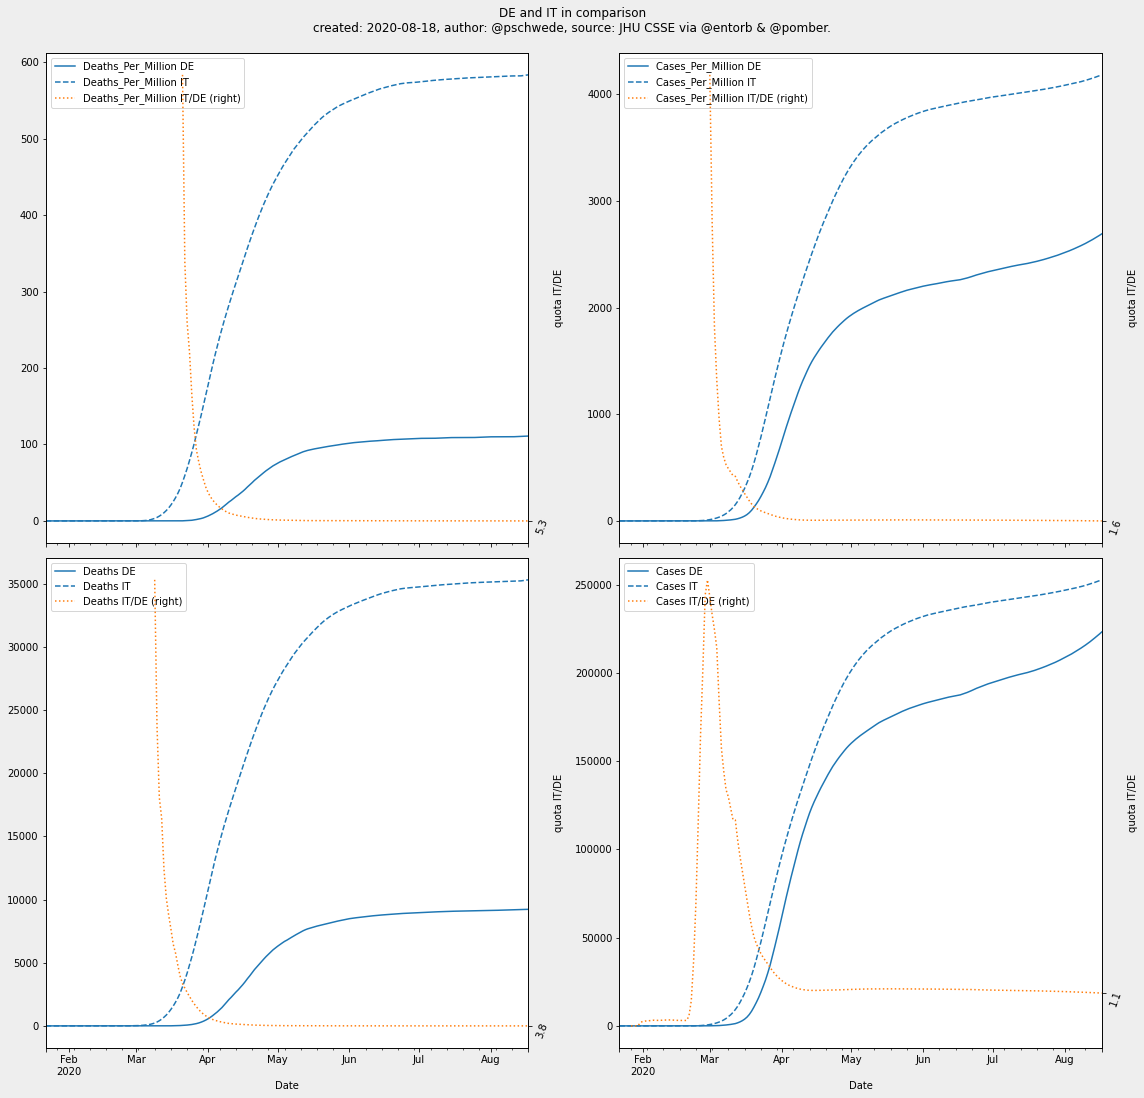

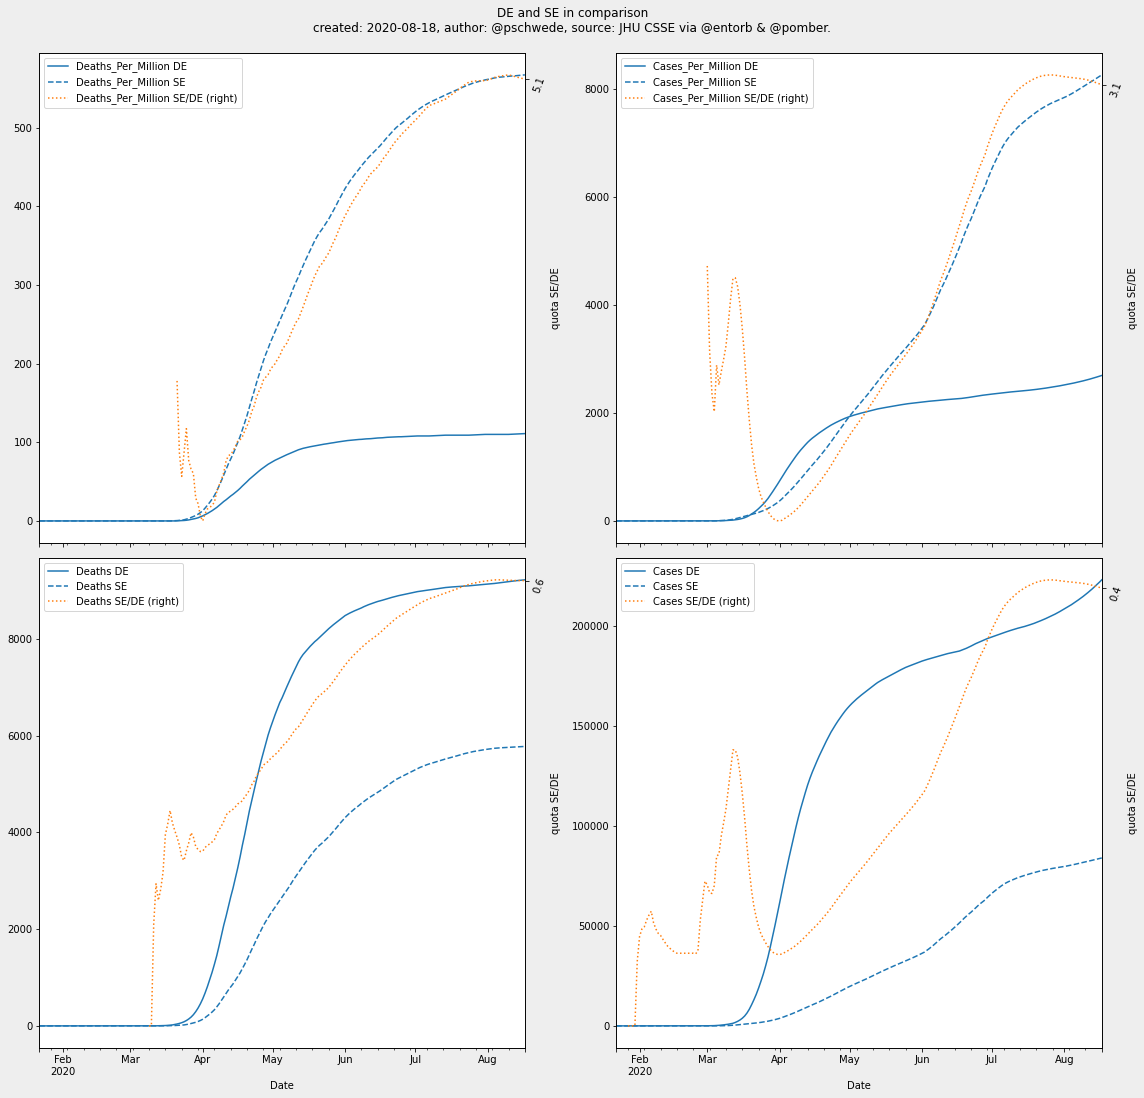

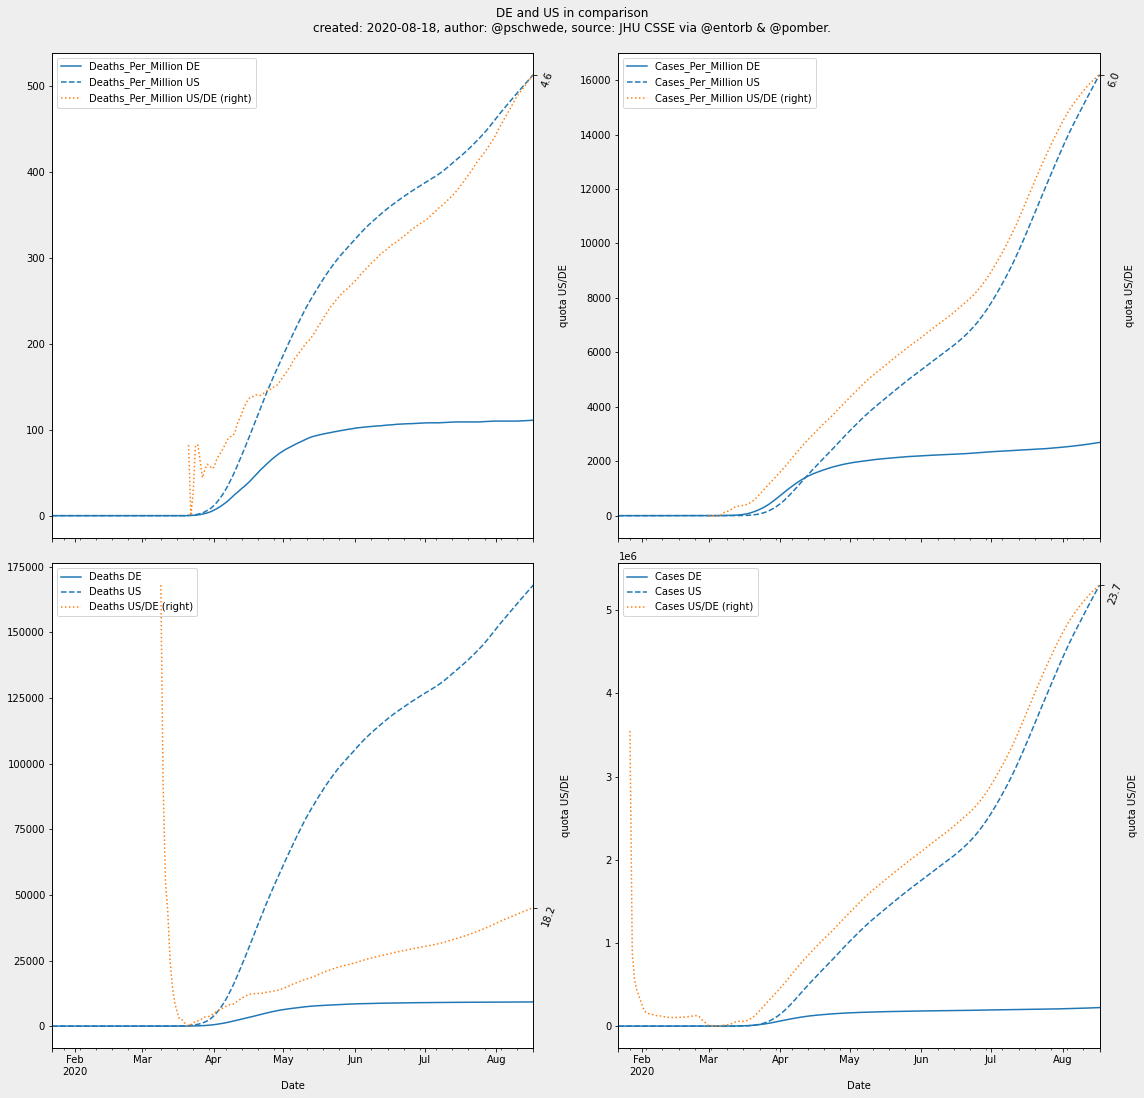

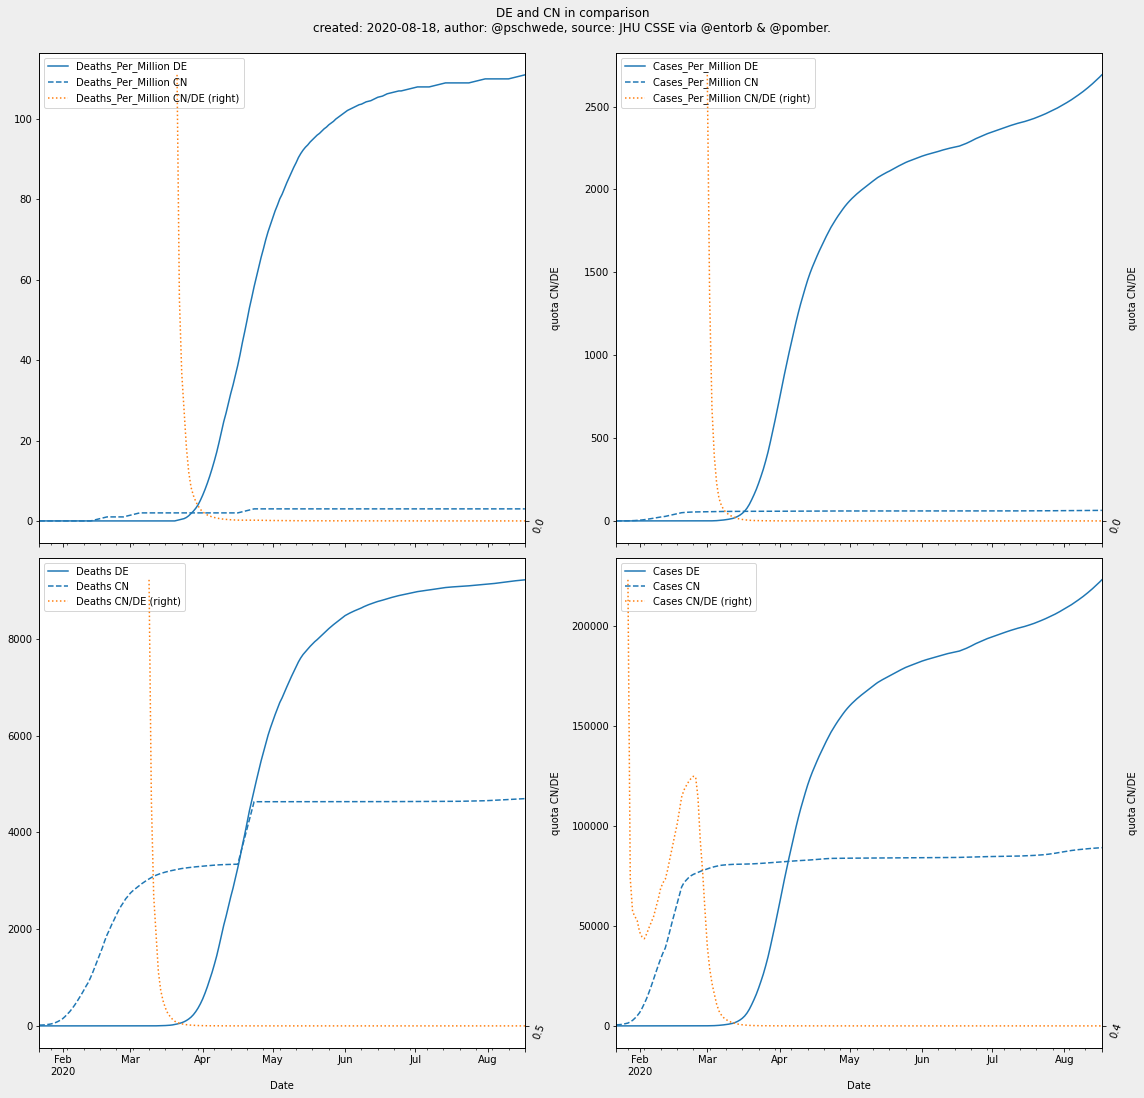

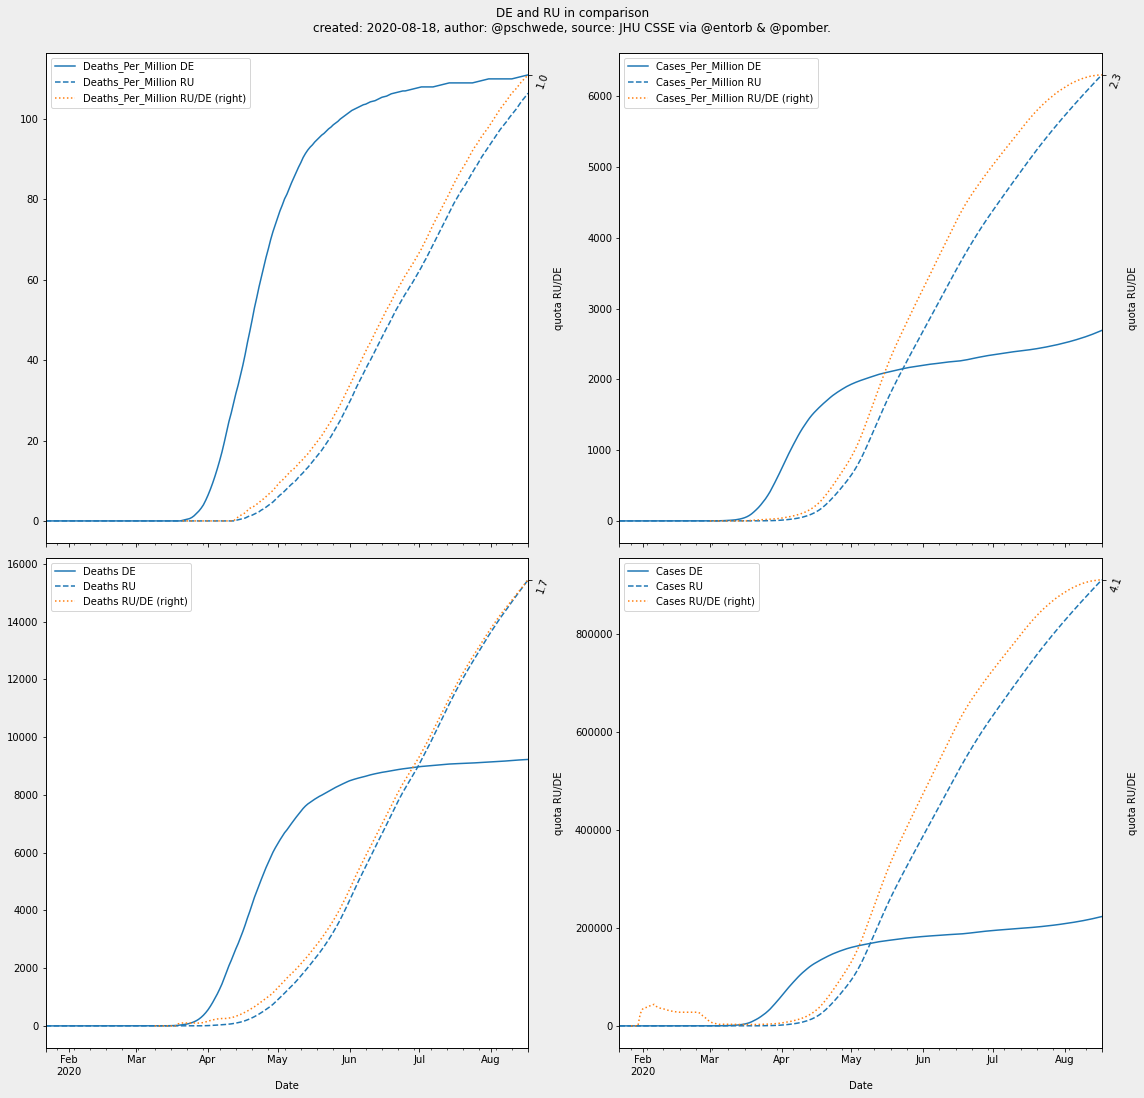

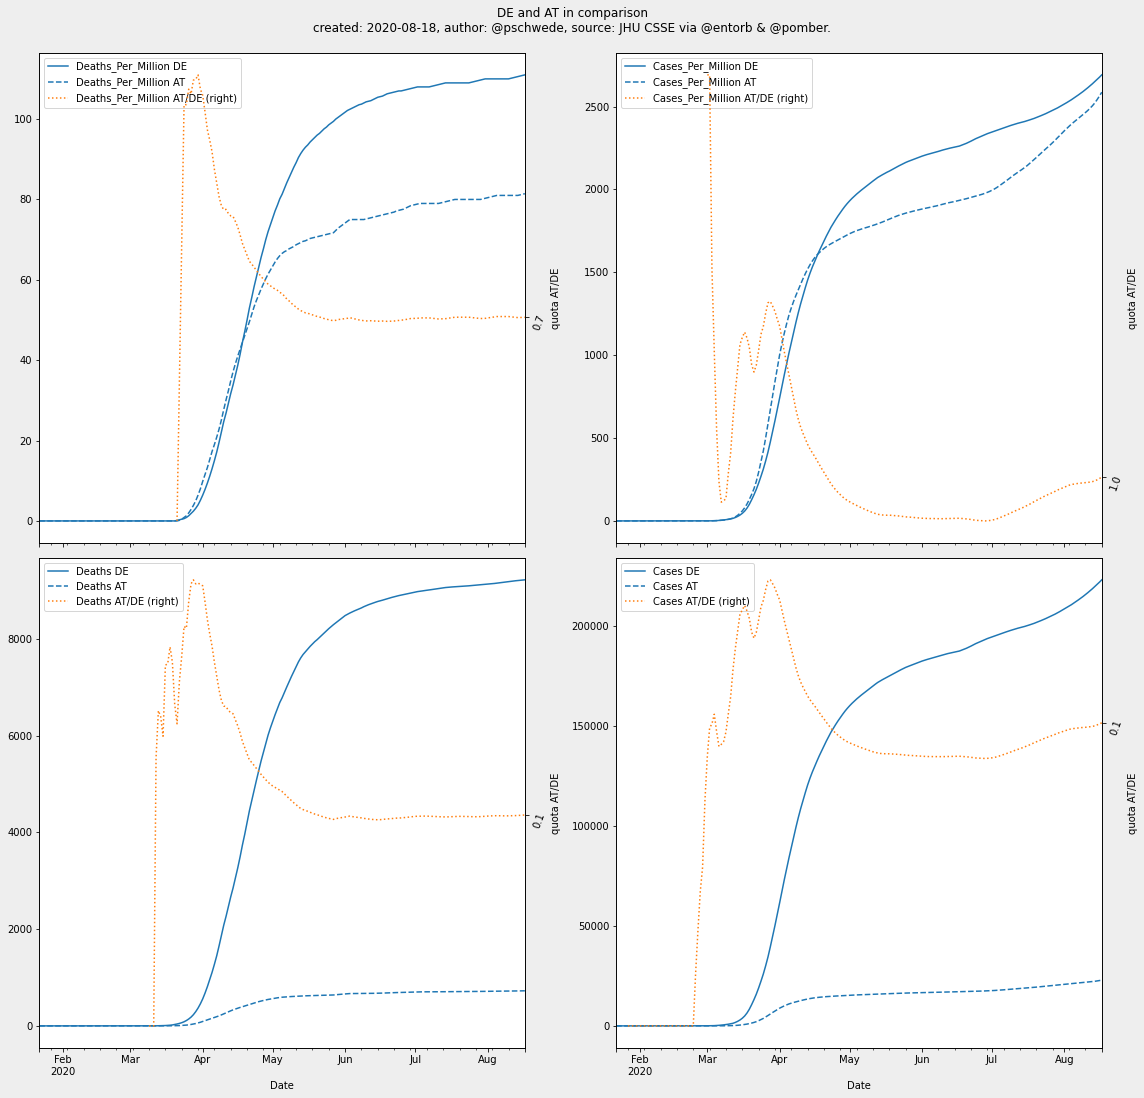

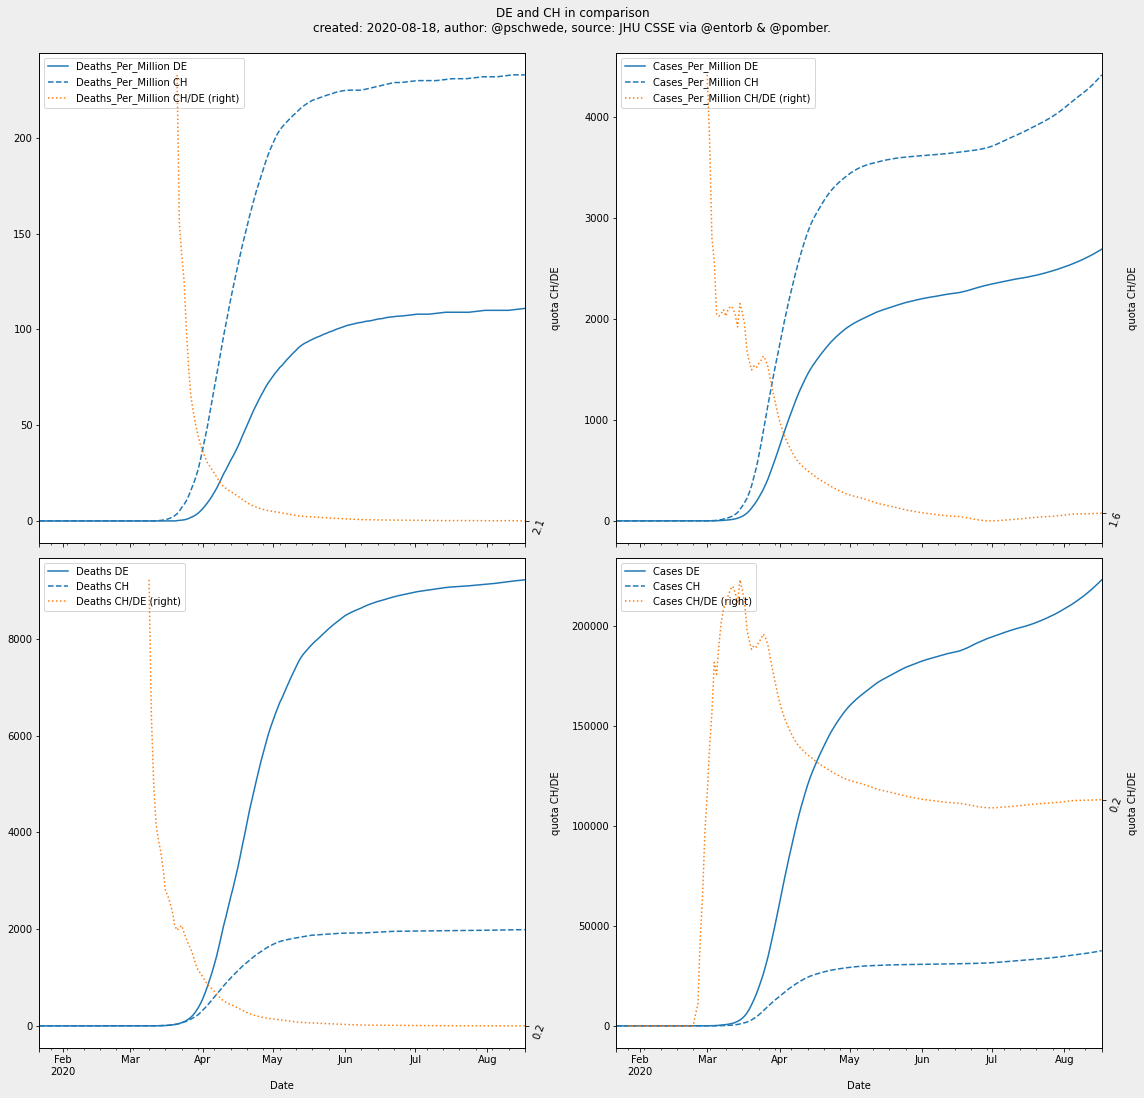

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from scrape import entorb

fst = 'DE'
for snd in ['IT', 'SE', 'US', 'CN', 'RU', 'AT', 'CH']:
    de = entorb.to_dataframe(nation=fst).rolling('7D').mean()
    se = entorb.to_dataframe(nation=snd).rolling('7D').mean()
    df = se / de

    fig, axes = plt.subplots(ncols=2, nrows=2)
    for ax, to_compare in zip(axes.flat, ['Deaths_Per_Million',
                                          'Cases_Per_Million',
                                          'Deaths',
                                          'Cases']):
        de[to_compare].plot(ax=ax, label="%s %s" % (to_compare, fst))
        se[to_compare].plot(ax=ax, label="%s %s" % (to_compare, snd),
                            linestyle='--', color=ax.lines[-1].get_color())
        ax2 = df[to_compare].plot(ax=ax,
                                  label="%s %s/DE (right)" % (to_compare, snd),
                                  secondary_y=True,
                                  linestyle=':' )
        yticks=[df[to_compare].replace(np.inf, np.nan).tail(1).values[0]]
        ax2.set_yticks(yticks)
        ax2.set_yticklabels(["%.1f" % y for y in yticks], rotation=70)
        ax2.set_ylabel("quota %s/DE" % snd)
        ax.legend(handles=ax.lines + ax2.lines, loc='upper left')
    fig.set_size_inches(16,16)
    now = datetime.datetime.now()
    fig.suptitle(("%s and %s in comparison\n"
                  "created: %04d-%02d-%02d, "
                  "author: @pschwede, "
                  "source: JHU CSSE via @entorb & @pomber.") % (fst, snd, now.year, now.month, now.day))
    fig.set_facecolor('#EEE')
    fig.tight_layout(rect=(0, 0.03, 1, 0.95))
    plt.show()